In [1]:
%load_ext autoreload
%autoreload 2
import logging
import sys
import numpy as np
import scipy.special as special
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib
# fake beta function
def special_beta(alpha, beta): return special.gamma(alpha)*special.gamma(beta)/special.gamma(alpha+beta)

In [2]:
import eko.dglap as dglap
import eko.interpolation as interpolation

In [3]:
def plot_dist(x,y,yref,title=None):
    """compare to distributions both in linear and logarithmic x-space"""
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(hspace=0.05)
    if title is not None:
       fig.suptitle(title)
    # small x
    ax1 = plt.subplot(2,3,1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.title("small x")
    plt.loglog(x,y,"o")
    plt.loglog(x,yref,"x")
    plt.subplot(2,3,4,sharex=ax1)
    plt.loglog(x,np.abs((y - yref)/yref),"x")
    plt.xlabel("x")
    # linear x
    ax2 = plt.subplot(2,3,2)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.title("linear x")
    plt.plot(x,y,"o")
    plt.plot(x,yref,"x")
    plt.subplot(2,3,5,sharex=ax2)
    plt.semilogy(x,np.abs((y - yref)/yref),"x")
    plt.xlabel("x")
    # large x
    ax3 = plt.subplot(2,3,3)
    oMx = 1.0 - x
    plt.setp(ax3.get_xticklabels(), visible=False)
    oMx_min = 1e-2
    oMx_max = 0.5
    ax3.set_xlim(oMx_min,oMx_max)
    plt.title("large x, i.e. small (1-x)")
    plt.loglog(oMx,y,"o")
    plt.loglog(oMx,yref,"x")
    ax = plt.subplot(2,3,6,sharex=ax3)
    plt.loglog(oMx,np.abs((y - yref)/yref),"x")
    plt.xlabel("1-x")
    return fig



In [4]:
toy_xgrid = np.array([1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,.1,.3,.5,.7,.9])
# implement Eq. 31 of arXiv:hep-ph/0204316
def toy_uv0(x):
    return 5.107200 * x**(0.8) * (1.0 - x)**3 / x
def toy_dv0(x):
    return 3.064320 * x**(0.8) * (1.0 - x)**4 / x
def toy_g0(x):
    return 1.7 * x**(-0.1) * (1.0 - x)**5 / x
def toy_dbar0(x):
    return 0.1939875 *  x**(-0.1) *  (1.0 - x)**6 / x
def toy_ubar0(x):
    return (1.0 - x) * toy_dbar0(x)
def toy_s0(x):
    return 0.2 * (toy_ubar0(x) + toy_dbar0(x))
def toy_sbar0(x):
    return toy_s0(x)
def toy_Lm0(x):
    return toy_dbar0(x) - toy_ubar0(x)
def toy_Lp0(x):
    return (toy_dbar0(x) + toy_ubar0(x))*2.0 # 2 is missing in the paper!
def toy_sp0(x):
    return toy_s0(x) + toy_sbar0(x)
def toy_T30(x):
    return -2.0 * toy_Lm0(x) + toy_uv0(x) - toy_dv0(x)
def toy_T80(x):
    return toy_Lp0(x) + toy_uv0(x) + toy_dv0(x) - 2.0*toy_sp0(x)
def toy_S0(x):
    return toy_uv0(x) + toy_dv0(x) + toy_Lp0(x) + toy_sp0(x)

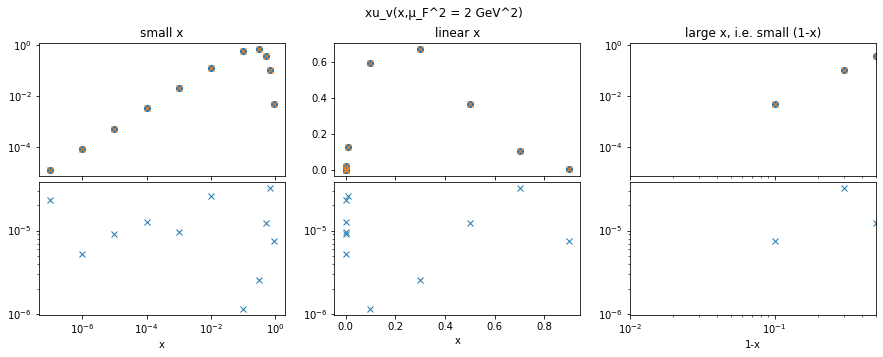

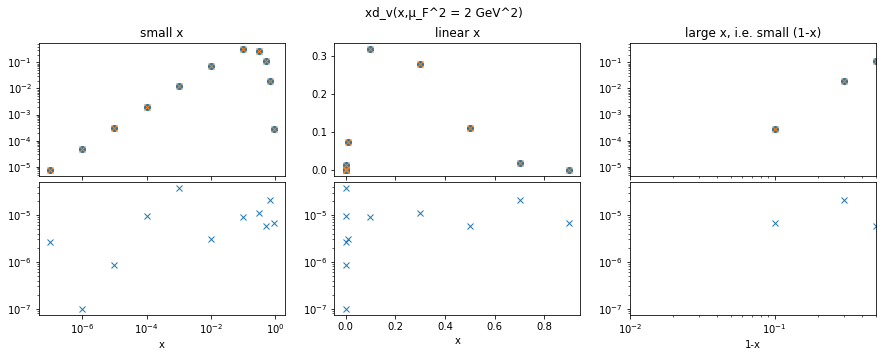

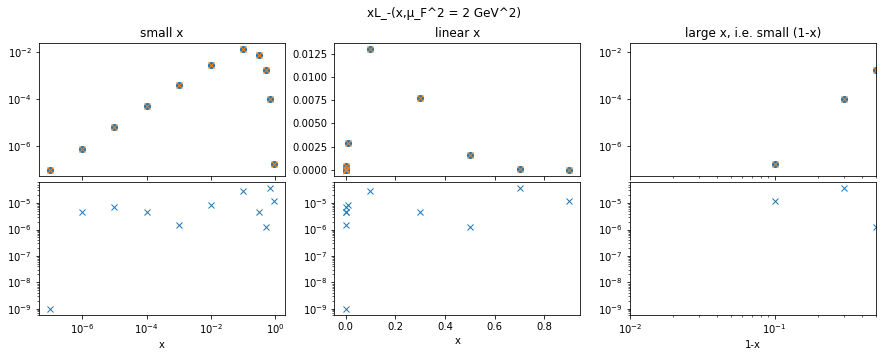

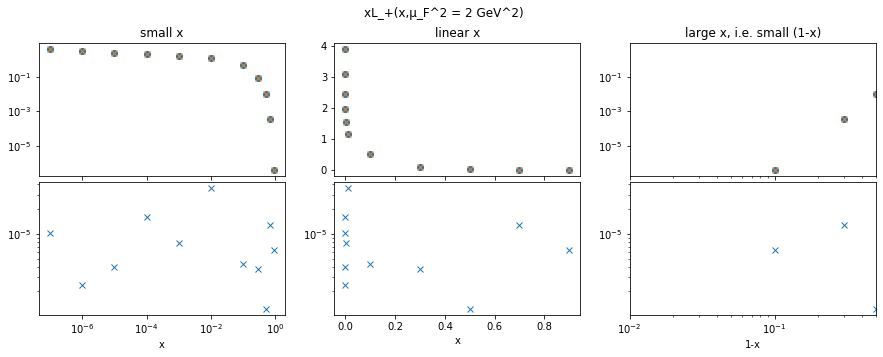

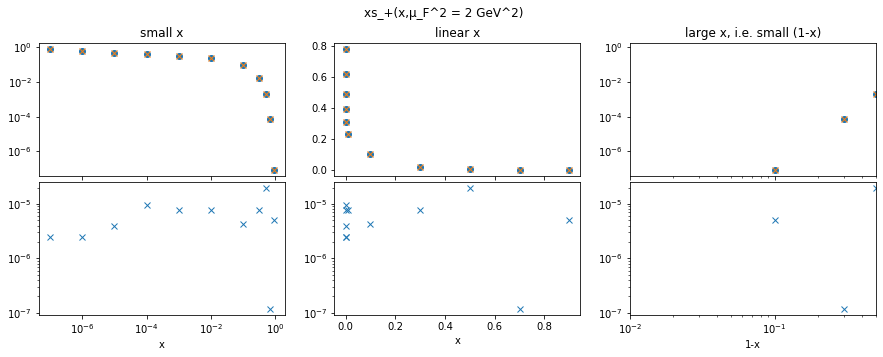

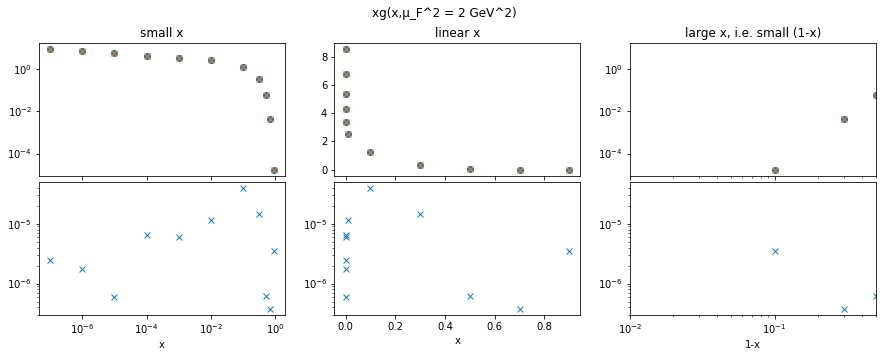

In [5]:
# check table 2 part 1 of arXiv:hep-ph/0204316
toy_uv0_grid = np.array([toy_uv0(x) for x in toy_xgrid])
toy_xuv0_grid_ref = np.array([1.2829e-5,8.0943e-5,5.1070e-4,3.2215e-3,2.0271e-2,1.2448e-1,5.9008e-1,6.6861e-1,3.6666e-1,1.0366e-1,4.6944e-3])
plot_dist(toy_xgrid,toy_xgrid*toy_uv0_grid,toy_xuv0_grid_ref,title="xu_v(x,µ_F^2 = 2 GeV^2)")

toy_dv0_grid = np.array([toy_dv0(x) for x in toy_xgrid])
toy_xdv0_grid_ref = np.array([7.6972e-6,4.8566e-5,3.0642e-4,1.9327e-3,1.2151e-2,7.3939e-2,3.1864e-1,2.8082e-1,1.1000e-1,1.8659e-2,2.8166e-4])
plot_dist(toy_xgrid,toy_xgrid*toy_dv0_grid,toy_xdv0_grid_ref,title="xd_v(x,µ_F^2 = 2 GeV^2)")

toy_Lm0_grid = np.array([toy_Lm0(x) for x in toy_xgrid])
toy_xLm0_grid_ref = np.array([9.7224e-8,7.7227e-7,6.1341e-6,4.8698e-5,3.8474e-4,2.8946e-3,1.2979e-2,7.7227e-3,1.6243e-3,1.0259e-4,1.7644e-7])
plot_dist(toy_xgrid,toy_xgrid*toy_Lm0_grid,toy_xLm0_grid_ref,title="xL_-(x,µ_F^2 = 2 GeV^2)")

toy_Lp0_grid = np.array([toy_Lp0(x) for x in toy_xgrid])
toy_xLp0_grid_ref = np.array([3.8890e+0,3.0891e+0,2.4536e+0,1.9478e+0,1.5382e+0,1.1520e+0,4.9319e-1,8.7524e-2,9.7458e-3,3.8103e-4,4.3129e-7])
plot_dist(toy_xgrid,toy_xgrid*toy_Lp0_grid,toy_xLp0_grid_ref,title="xL_+(x,µ_F^2 = 2 GeV^2)")

toy_sp0_grid = np.array([toy_sp0(x) for x in toy_xgrid])
toy_xsp0_grid_ref = np.array([7.7779e-1,6.1782e-1,4.9072e-1,3.8957e-1,3.0764e-1,2.3041e-1,9.8638e-2,1.7505e-2,1.9492e-3,7.6207e-5,8.6259e-8])
plot_dist(toy_xgrid,toy_xgrid*toy_sp0_grid,toy_xsp0_grid_ref,title="xs_+(x,µ_F^2 = 2 GeV^2)")

toy_g0_grid = np.array([toy_g0(x) for x in toy_xgrid])
toy_xg0_grid_ref = np.array([8.5202e+0,6.7678e+0,5.3756e+0,4.2681e+0,3.3750e+0,2.5623e+0,1.2638e+0,3.2228e-1,5.6938e-2,4.2810e-3,1.7180e-5])
plot_dist(toy_xgrid,toy_xgrid*toy_g0_grid,toy_xg0_grid_ref,title="xg(x,µ_F^2 = 2 GeV^2)")

plt.show()

In [6]:
xgrid_low = interpolation.get_xgrid_linear_at_log(35,1e-7,0.1)
xgrid_mid = interpolation.get_xgrid_linear_at_id(15,0.1,1.0)
xgrid_high = np.array([])#1.0-interpolation.get_xgrid_linear_at_log(10,1e-3,1.0 - 0.9)
xgrid = np.unique(np.concatenate((xgrid_low,xgrid_mid,xgrid_high)))
polynom_rank = 4

logStdout = logging.StreamHandler(sys.stdout)
logStdout.setLevel(logging.INFO)
logStdout.setFormatter(logging.Formatter('%(message)s'))
logging.getLogger("eko.dglap").handlers = []
logging.getLogger("eko.dglap").addHandler(logStdout)
logging.getLogger("eko.dglap").setLevel(logging.DEBUG)

In [7]:
%%time
ret1 = dglap.run_dglap({
    "PTO": 0,
    'alphas': 0.35,
    'Qref': np.sqrt(2),
    'Q0': np.sqrt(2),
    'NfFF': 4,

    "xgrid_type": "custom",
    "xgrid_custom": xgrid,
    "xgrid_polynom_rank": polynom_rank,
    "xgrid_interpolation": "log",
    "targetgrid": toy_xgrid,
    "Q2grid": [1e4]
})

setup: {'PTO': 0, 'alphas': 0.35, 'Qref': 1.4142135623730951, 'Q0': 1.4142135623730951, 'NfFF': 4, 'xgrid_type': 'custom', 'xgrid_custom': array([1.00000000e-07, 1.50131073e-07, 2.25393390e-07, 3.38385515e-07,
       5.08021805e-07, 7.62698586e-07, 1.14504757e-06, 1.71907220e-06,
       2.58086154e-06, 3.87467512e-06, 5.81709133e-06, 8.73326162e-06,
       1.31113394e-05, 1.96841945e-05, 2.95520924e-05, 4.43668733e-05,
       6.66084629e-05, 1.00000000e-04, 1.50131073e-04, 2.25393390e-04,
       3.38385515e-04, 5.08021805e-04, 7.62698586e-04, 1.14504757e-03,
       1.71907220e-03, 2.58086154e-03, 3.87467512e-03, 5.81709133e-03,
       8.73326162e-03, 1.31113394e-02, 1.96841945e-02, 2.95520924e-02,
       4.43668733e-02, 6.66084629e-02, 1.00000000e-01, 1.64285714e-01,
       2.28571429e-01, 2.92857143e-01, 3.57142857e-01, 4.21428571e-01,
       4.85714286e-01, 5.50000000e-01, 6.14285714e-01, 6.78571429e-01,
       7.42857143e-01, 8.07142857e-01, 8.71428571e-01, 9.35714286e-01,
       1.

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib64/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/usr/lib64/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/usr/lib64/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/usr/lib64/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib64/python3.8/runpy.py", line 192, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib64/python3.8/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.8/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File 

CPU times: user 2min 56s, sys: 246 ms, total: 2min 57s
Wall time: 2min 57s


In [8]:
xgrid_low = interpolation.get_xgrid_linear_at_log(15,1e-7,0.1)
xgrid_mid = interpolation.get_xgrid_linear_at_id(15,0.1,0.98)
xgrid_high = 1.0-interpolation.get_xgrid_linear_at_log(1,1e-3,1.0 - 0.9)
xgrid = np.unique(np.concatenate((xgrid_low,xgrid_mid,xgrid_high)))
polynom_rank = 4

logStdout = logging.StreamHandler(sys.stdout)
logStdout.setLevel(logging.INFO)
logStdout.setFormatter(logging.Formatter('%(message)s'))
logging.getLogger("eko.dglap").handlers = []
logging.getLogger("eko.dglap").addHandler(logStdout)
logging.getLogger("eko.dglap").setLevel(logging.DEBUG)

In [9]:
%%time
ret2 = dglap.run_dglap({
    "PTO": 0,
    'alphas': 0.35,
    'Qref': np.sqrt(2),
    'Q0': np.sqrt(2),
    'NfFF': 4,

    "xgrid_type": "custom",
    "xgrid_custom": xgrid,
    "xgrid_interpolation": "id",
    "xgrid_polynom_rank": polynom_rank,
    "targetgrid": toy_xgrid,
    "Q2grid": [1e4]
})

setup: {'PTO': 0, 'alphas': 0.35, 'Qref': 1.4142135623730951, 'Q0': 1.4142135623730951, 'NfFF': 4, 'xgrid_type': 'custom', 'xgrid_custom': array([1.00000000e-07, 2.68269580e-07, 7.19685673e-07, 1.93069773e-06,
       5.17947468e-06, 1.38949549e-05, 3.72759372e-05, 1.00000000e-04,
       2.68269580e-04, 7.19685673e-04, 1.93069773e-03, 5.17947468e-03,
       1.38949549e-02, 3.72759372e-02, 1.00000000e-01, 1.62857143e-01,
       2.25714286e-01, 2.88571429e-01, 3.51428571e-01, 4.14285714e-01,
       4.77142857e-01, 5.40000000e-01, 6.02857143e-01, 6.65714286e-01,
       7.28571429e-01, 7.91428571e-01, 8.54285714e-01, 9.17142857e-01,
       9.80000000e-01, 9.99000000e-01]), 'xgrid_interpolation': 'id', 'xgrid_polynom_rank': 4, 'targetgrid': array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 3.e-01,
       5.e-01, 7.e-01, 9.e-01]), 'Q2grid': [10000.0]}
is_log_interpolation = False
computing NS operator - ... 
computing NS operator - 1/11 
computing NS operator - 2/11 
computing NS

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib64/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/usr/lib64/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/usr/lib64/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/usr/lib64/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib64/python3.8/runpy.py", line 192, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib64/python3.8/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.8/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File 

CPU times: user 1min 28s, sys: 49.9 ms, total: 1min 28s
Wall time: 1min 28s


In [10]:
# check table 2 part 2 of arXiv:hep-ph/0204316
def plot_table2_2(ret1):
    toy_uv1_xgrid = np.array([toy_uv0(x) for x in ret1["xgrid"]])
    toy_uv1_grid = np.dot(ret1["operators"]["NS"],toy_uv1_xgrid)
    toy_xuv1_grid_ref = np.array([5.7722e-5,3.3373e-4,1.8724e-3,1.0057e-2,5.0392e-2,2.1955e-1,5.7267e-1,3.7925e-1,1.3476e-1,2.3123e-2,4.3443e-4])
    plot_dist(toy_xgrid,toy_xgrid*toy_uv1_grid,toy_xuv1_grid_ref,title="xu_v(x,µ_F^2 = 10^4 GeV^2)")

    toy_dv1_xgrid = np.array([toy_dv0(x) for x in ret1["xgrid"]])
    toy_dv1_grid = np.dot(ret1["operators"]["NS"],toy_dv1_xgrid)
    toy_xdv1_grid_ref = np.array([3.4343e-5,1.9800e-4,1.1065e-3,5.9076e-3,2.9296e-2,1.2433e-1,2.8413e-1,1.4186e-1,3.5364e-2,3.5943e-3,2.2287e-5])
    plot_dist(toy_xgrid,toy_xgrid*toy_dv1_grid,toy_xdv1_grid_ref,title="xd_v(x,µ_F^2 = 10^4 GeV^2)")

    toy_T31_xgrid = np.array([toy_T30(x) for x in ret1["xgrid"]])
    toy_T31_grid = np.dot(ret1["operators"]["NS"],toy_T31_xgrid)
    toy_xLm1_grid_ref = np.array([7.6527e-7,5.0137e-6,3.1696e-5,1.9071e-4,1.0618e-3,4.9731e-3,1.0470e-2,3.3029e-3,4.2815e-4,1.5868e-5,1.1042e-8])
    toy_xT31_grid_ref = -2.0 * toy_xLm1_grid_ref + toy_xuv1_grid_ref - toy_xdv1_grid_ref
    plot_dist(toy_xgrid,toy_xgrid*toy_T31_grid,toy_xT31_grid_ref,title="xT_3(x,µ_F^2 = 10^4 GeV^2)")

    toy_T81_xgrid = np.array([toy_T80(x) for x in ret1["xgrid"]])
    toy_T81_grid = np.dot(ret1["operators"]["NS"],toy_T81_xgrid)
    toy_xLp1_grid_ref = np.array([9.9465e+1,5.0259e+1,2.4378e+1,1.1323e+1,5.0324e+0,2.0433e+0,4.0832e-1,4.0165e-2,2.8624e-3,6.8961e-5,3.6293e-8])
    toy_xsp1_grid_ref = np.array([4.8642e+1,2.4263e+1,1.1501e+1,5.1164e+0,2.0918e+0,7.2814e-1,1.1698e-1,1.0516e-2,7.3138e-4,1.7725e-5,1.0192e-8])
    toy_xT81_grid_ref = toy_xLp1_grid_ref + toy_xuv1_grid_ref + toy_xdv1_grid_ref - 2.0 * toy_xsp1_grid_ref
    plot_dist(toy_xgrid,toy_xgrid*toy_T81_grid,toy_xT81_grid_ref,title="xT_8(x,µ_F^2 = 10^4 GeV^2)")

    toy_T151_xgrid = np.array([toy_S0(x) for x in ret1["xgrid"]])
    toy_T151_grid = np.dot(ret1["operators"]["NS"],toy_T151_xgrid)
    toy_xcp1_grid_ref = np.array([4.7914e+1,2.3685e+1,1.1042e+1,4.7530e+0,1.8089e+0,5.3247e-1,5.8864e-2,4.1379e-3,2.6481e-4,6.5549e-6,4.8893e-9])
    toy_T151_grid_ref = toy_xLp1_grid_ref + toy_xuv1_grid_ref + toy_xdv1_grid_ref + toy_xsp1_grid_ref - 3.0 * toy_xcp1_grid_ref
    plot_dist(toy_xgrid,toy_xgrid*toy_T151_grid,toy_T151_grid_ref,title="xT_15(x,µ_F^2 = 10^4 GeV^2)")

    toy_S1_xgrid = np.array([toy_S0(x) for x in ret1["xgrid"]])
    toy_g1_xgrid = np.array([toy_g0(x) for x in ret1["xgrid"]])
    toy_S1_grid = np.dot(ret1["operators"]["S_qq"],toy_S1_xgrid) + np.dot(ret1["operators"]["S_qg"],toy_g1_xgrid)
    toy_g1_grid = np.dot(ret1["operators"]["S_gq"],toy_S1_xgrid) + np.dot(ret1["operators"]["S_gg"],toy_S1_xgrid)
    toy_xg1_grid_ref = np.array([1.3162e+3,6.0008e+2,2.5419e+2,9.7371e+1,3.2078e+1,8.0546e+0,8.8766e-1,8.2676e-2,7.9240e-3,3.7311e-4,1.0918e-6])
    toy_xS1_grid_ref = toy_xuv1_grid_ref + toy_xdv1_grid_ref + toy_xLp1_grid_ref + toy_xsp1_grid_ref + toy_xcp1_grid_ref
    plot_dist(toy_xgrid,toy_xgrid*toy_S1_grid,toy_xS1_grid_ref,title="xSigma(x,µ_F^2 = 10^4 GeV^2)")
    plot_dist(toy_xgrid,toy_xgrid*toy_g1_grid,toy_xg1_grid_ref,title="xg(x,µ_F^2 = 10^4 GeV^2)")
    

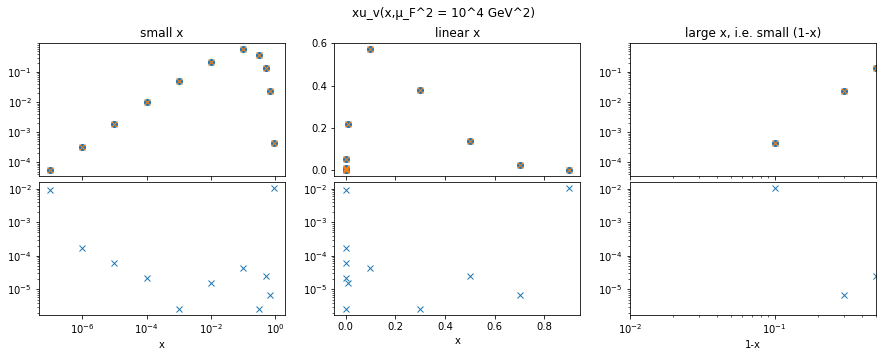

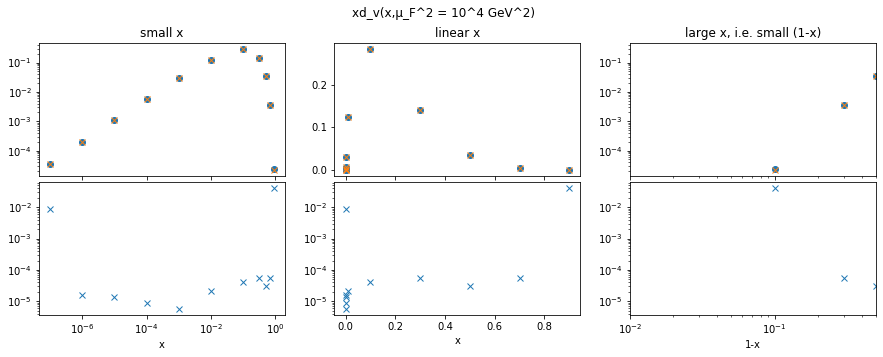

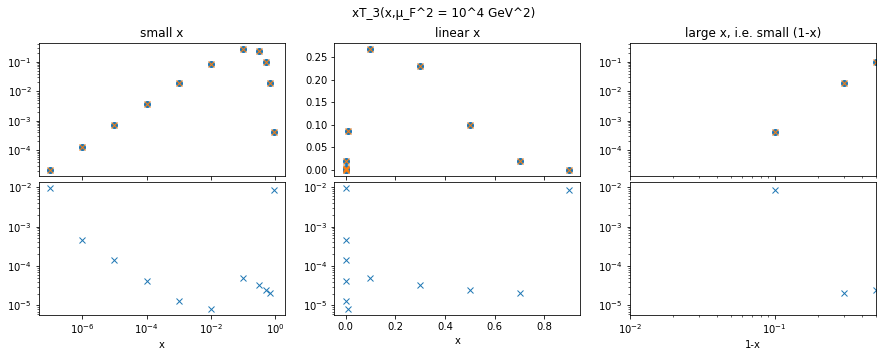

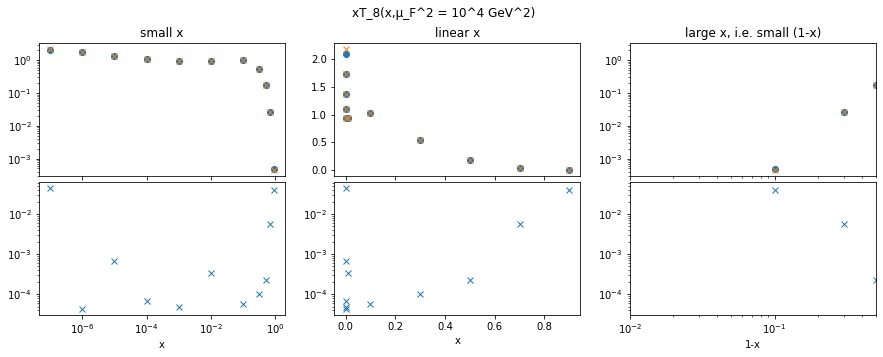

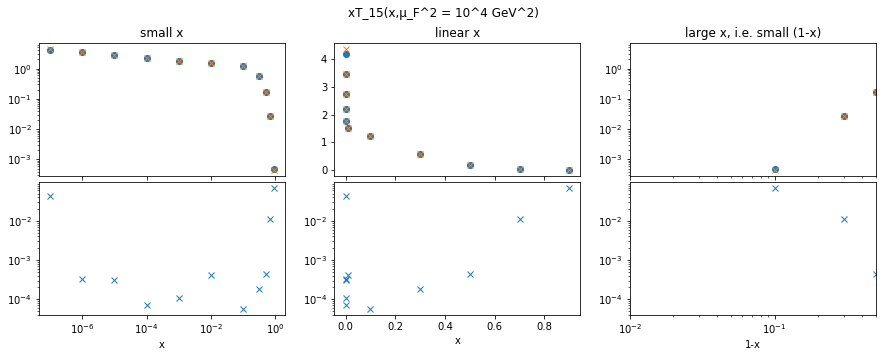

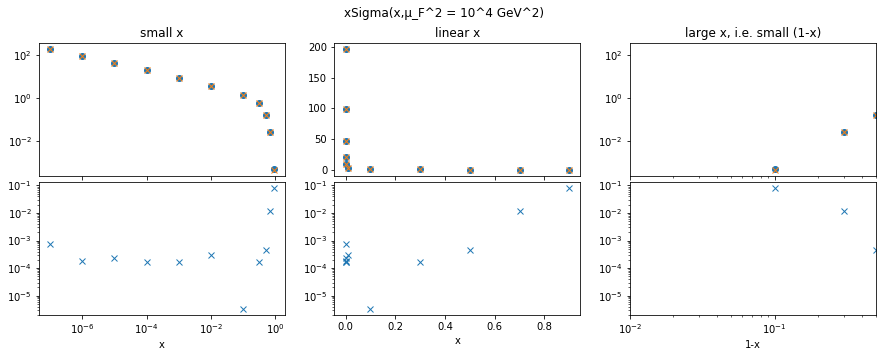

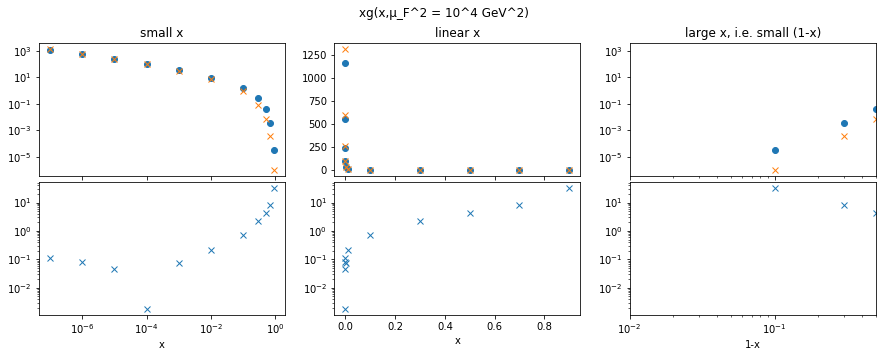

In [11]:
plot_table2_2(ret1)

In [12]:
# plot operators
def plot_operator(ret,var_name="NS",log_operator=True,abs_operator=False):
    fig = plt.figure(figsize=(25,5))
    fig.suptitle(var_name)

    ax = plt.subplot(1,3,1)
    if abs_operator:
        plt.title("|operator|")
    else:
        plt.title("operator")
    norm = matplotlib.colors.LogNorm() if log_operator else None
    op = ret["operators"][var_name]
    if abs_operator:
        op = np.abs(op)
    im = plt.imshow(op,norm=norm,aspect='auto')
    cb = plt.colorbar(im,ax=ax,fraction=0.034, pad=0.04)

    ax = plt.subplot(1,3,2)
    plt.title("operator_error")
    im = plt.imshow(ret["operator_errors"][var_name],norm=matplotlib.colors.LogNorm(),aspect='auto')
    cb = plt.colorbar(im,ax=ax,fraction=0.034, pad=0.04)

    ax = plt.subplot(1,3,3)
    plt.title("|error/value|")
    im = plt.imshow(np.abs(ret["operator_errors"][var_name]/ret["operators"][var_name]),norm=matplotlib.colors.LogNorm(),aspect='auto')
    cb = plt.colorbar(im,ax=ax,fraction=0.034, pad=0.04)
    return fig

In [13]:
def print_op(ret1,var_name="NS",l0=6,c0=10):
    print("operator:")
    for l in ret1["operators"][var_name][:l0]:
        ll = ""
        for e in l[-c0:]:
            ll += f"{e: .2e}\t"
        print(ll)
    print("error:")
    for l in ret1["operator_errors"][var_name][:l0]:
        ll = ""
        for e in l[-c0:]:
            ll += f"{e: .2e}\t"
        print(ll)

operator:
 7.31e+01	-7.90e+01	-8.37e+00	 1.20e+02	-1.13e+02	-1.42e+02	 6.95e+02	-1.23e+03	 1.01e+03	 3.19e+02	
-7.23e+00	 2.20e+01	-3.35e+01	 4.37e+01	-6.06e+01	 9.11e+01	-1.18e+02	 1.02e+02	-8.88e+00	-5.19e+01	
 1.89e-01	-1.41e+00	 4.63e+00	-7.04e+00	 9.50e+00	-9.40e+00	 5.49e+00	 4.44e+00	-1.28e+01	 2.18e+00	
 3.19e-01	 5.77e-02	 7.99e-02	 4.39e-01	-1.89e-01	 1.24e-02	 1.20e+00	-2.01e+00	 1.97e+00	 5.24e-01	
 1.26e-01	 1.71e-01	 4.83e-02	 1.84e-01	-1.84e-02	 2.63e-01	-1.54e-01	 2.84e-01	 4.94e-02	-8.27e-02	
 1.05e-01	 8.80e-02	 9.56e-02	 5.63e-02	 9.44e-02	 3.73e-02	 8.12e-02	 5.14e-02	 3.87e-02	 2.33e-02	
error:
 1.16e-03	 1.52e-03	 1.40e-03	 2.14e-03	 3.06e-03	 3.79e-03	 5.89e-03	 8.42e-03	 3.39e-03	 1.13e-03	
 1.45e-05	 1.57e-05	 1.74e-05	 1.97e-05	 2.62e-05	 4.83e-05	 1.08e-04	 3.90e-05	 4.49e-05	 1.10e-05	
 1.51e-07	 1.70e-07	 2.05e-07	 2.46e-07	 4.45e-07	 7.69e-07	 7.25e-07	 9.29e-07	 4.14e-07	 1.43e-07	
 1.63e-09	 2.46e-09	 2.37e-09	 2.31e-09	 3.64e-09	 4.93e-09	 5.36e-09	 6.0

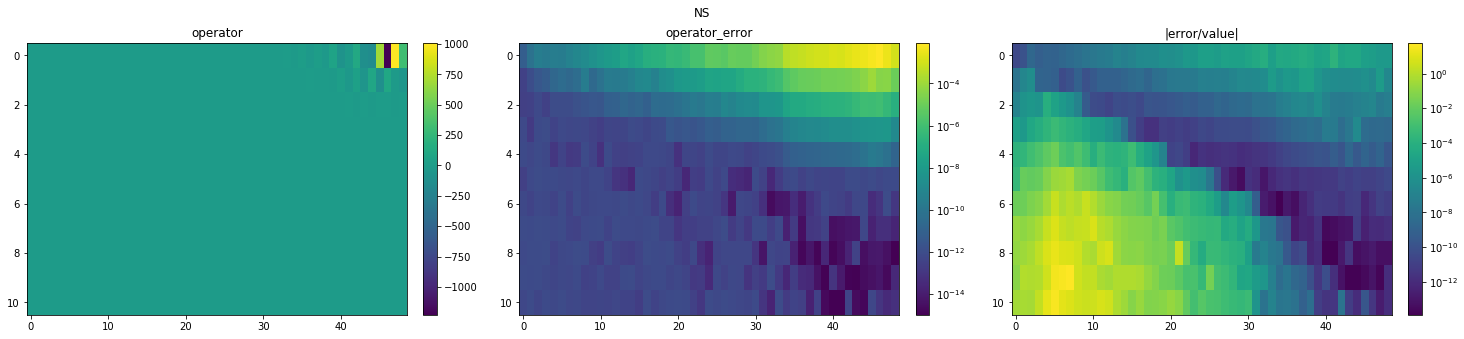

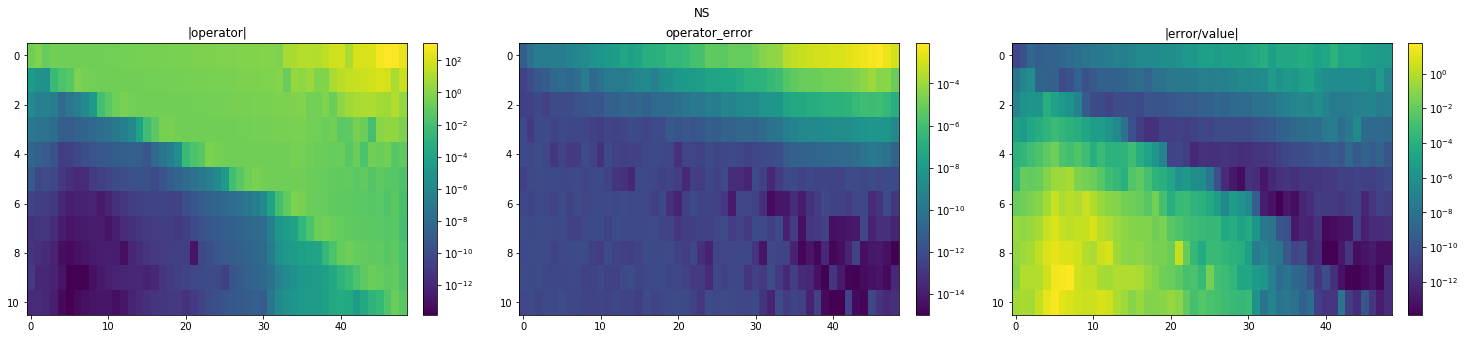

In [14]:
print_op(ret1)
plot_operator(ret1,log_operator=False);
plot_operator(ret1,abs_operator=True);

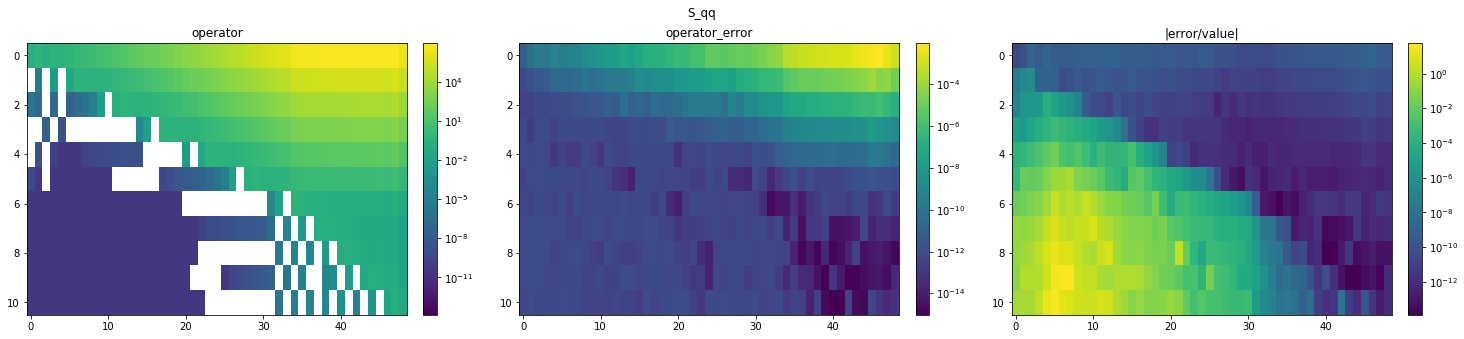

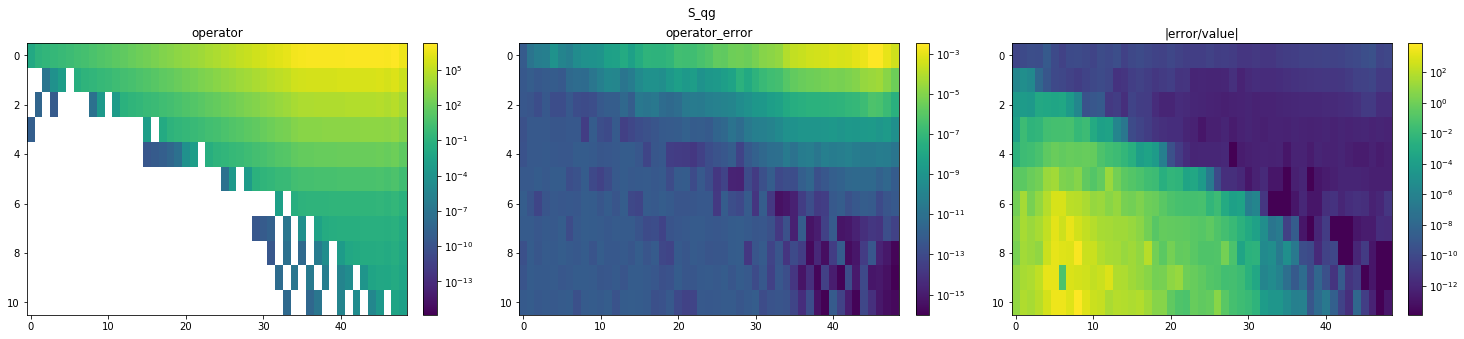

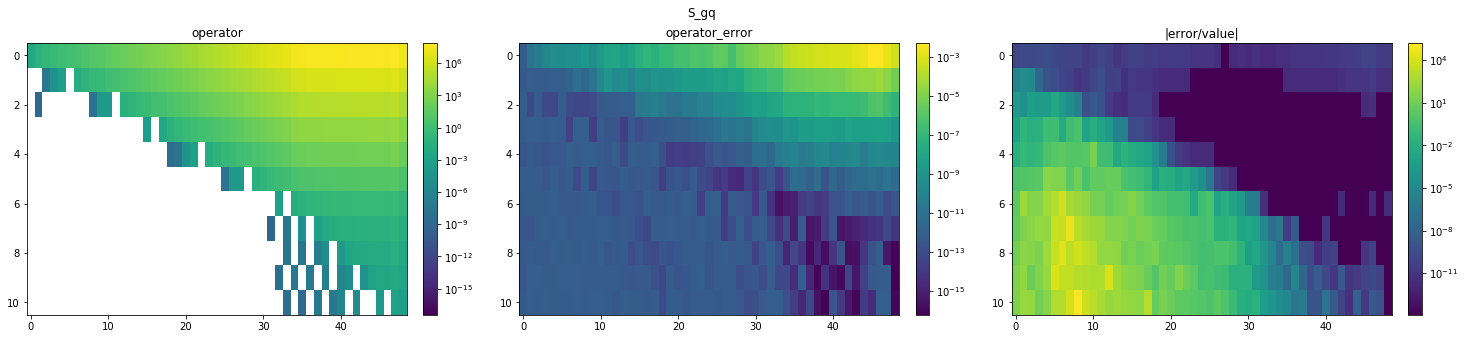

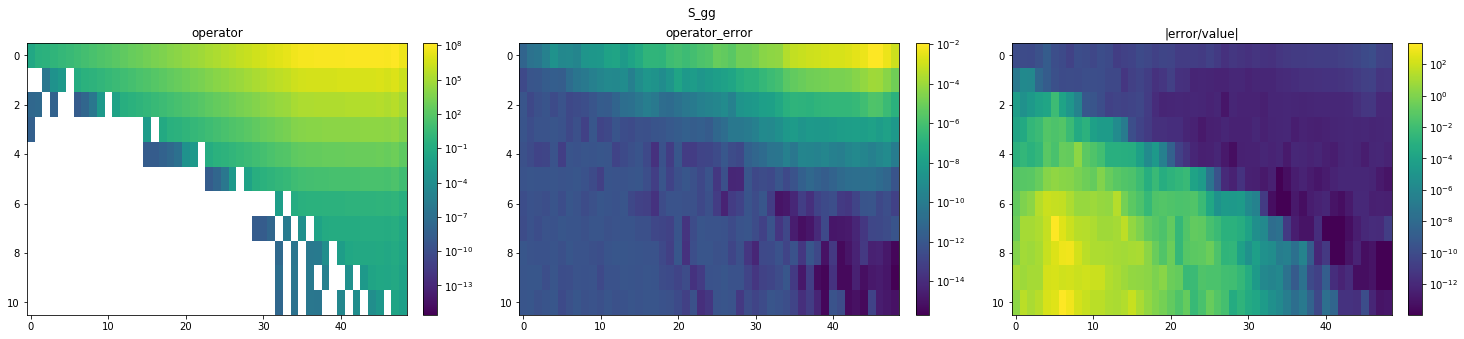

In [15]:
plot_operator(ret1,"S_qq");
plot_operator(ret1,"S_qg");
plot_operator(ret1,"S_gq");
plot_operator(ret1,"S_gg");